Accuracy of the Random Forest model: 0.90

Feature Importances:
alcohol                 0.167435
sulphates               0.118349
volatile acidity        0.107241
density                 0.092904
citric acid             0.091830
total sulfur dioxide    0.086512
chlorides               0.075244
fixed acidity           0.073031
residual sugar          0.068095
pH                      0.060106
free sulfur dioxide     0.059253
dtype: float64


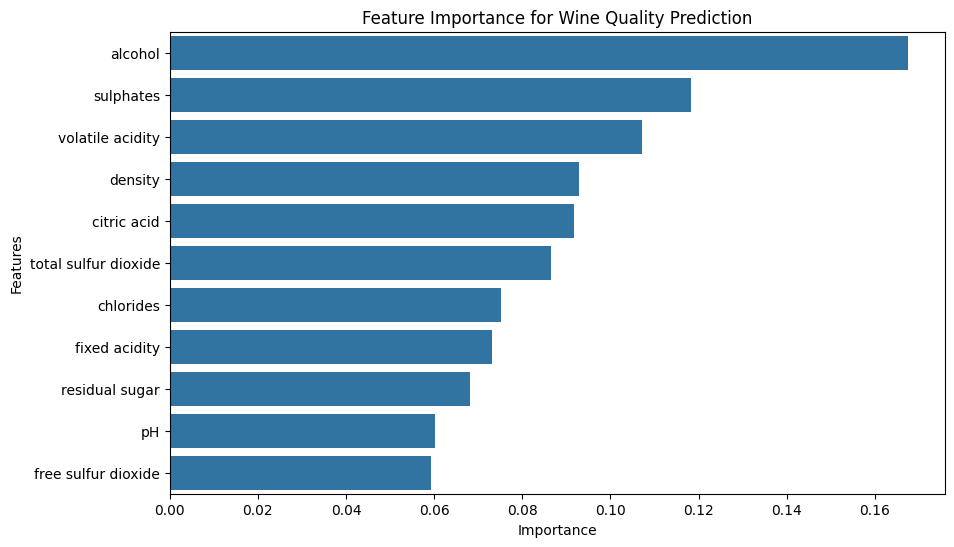

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset directly from the UCI repository
# Note: This is for the red wine dataset. The white wine dataset is in a separate file.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, sep=';')

# Data Preprocessing
# The 'quality' column is the target variable.
# We'll create a new binary target for "good" vs "bad" wine.
# Let's define "good" as a quality score of 7 or higher.
wine_df['quality_category'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Define features (X) and target (y)
X = wine_df.drop(['quality', 'quality_category'], axis=1)
y = wine_df['quality_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest model: {accuracy:.2f}')

# Bonus: Feature Importance
# Let's see which chemical properties are most important for predicting quality.
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_features = feature_importances.sort_values(ascending=False)

print("\nFeature Importances:")
print(sorted_features)

# Plotting the feature importances for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features, y=sorted_features.index)
plt.title('Feature Importance for Wine Quality Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset directly from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
try:
    wine_df = pd.read_csv(url, sep=';')
except Exception as e:
    print(f"Error loading data: {e}. Please check the URL or your internet connection.")
    exit()

In [5]:
# Data Preprocessing
wine_df['quality_category'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Define all features and target
all_features = wine_df.drop(['quality', 'quality_category'], axis=1)
y = wine_df['quality_category']

In [6]:
# --- Step 1: Find the most important features ---
# Train an initial model to find feature importances
temp_model = RandomForestClassifier(n_estimators=100, random_state=42)
temp_model.fit(all_features, y)

# Get feature importances and sort them
feature_importances = pd.Series(temp_model.feature_importances_, index=all_features.columns)
sorted_features = feature_importances.sort_values(ascending=False)

# Select the top 6 features (you can change this number)
top_n = 6
selected_features = sorted_features.index[:top_n].tolist()

print("The most important features are:")
print(selected_features)
print("-" * 50)

The most important features are:
['alcohol', 'sulphates', 'volatile acidity', 'density', 'citric acid', 'fixed acidity']
--------------------------------------------------


In [7]:
# --- Step 2: Retrain the model with only the selected features ---
X_reduced = all_features[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Create and train the new, simpler model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(f"Model training with {top_n} features complete. You can now enter wine properties to get a prediction.")
print("The required properties for prediction are:")
print(selected_features)

Model training with 6 features complete. You can now enter wine properties to get a prediction.
The required properties for prediction are:
['alcohol', 'sulphates', 'volatile acidity', 'density', 'citric acid', 'fixed acidity']


In [8]:
def predict_wine_quality(model, input_data):
    """Predicts wine quality category from user input."""
    try:
        input_array = np.array([input_data])
        prediction = model.predict(input_array)

        if prediction[0] == 1:
            return "Good Quality Wine"
        else:
            return "Bad Quality Wine"

    except ValueError as e:
        return f"Error with input data: {e}. Please enter numeric values."

# --- Interactive Loop for User Input ---
while True:
    user_input_list = []
    print("-" * 50)
    for feature in selected_features:
        while True:
            try:
                value = float(input(f"Enter value for '{feature}': "))
                user_input_list.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")

    result = predict_wine_quality(rf_model, user_input_list)
    print(f"\nPrediction: {result}")

    another_prediction = input("Do you want to make another prediction? (yes/no): ").lower()
    if another_prediction != 'yes':
        break

print("Thank you for using the wine quality predictor!")

--------------------------------------------------
Enter value for 'alcohol': 82
Enter value for 'sulphates': 9
Enter value for 'volatile acidity': 6
Enter value for 'density': 5
Enter value for 'citric acid': 8
Enter value for 'fixed acidity': 7


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Prediction: Bad Quality Wine
Do you want to make another prediction? (yes/no): no
Thank you for using the wine quality predictor!
